In [28]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np


In [3]:
# Load the data
train_df = pd.read_csv(r"C:\Users\44776\Documents\NEW DAT SCIENC PROJECT\BIg Mart data\Test-Set.csv")
#test_df = pd.read_csv(r'C:\Users\44776\Documents\NEW DAT SCIENC PROJECT\BIg Mart data\Train-Set.csv')

In [4]:
train_df

,ProductID,Weight,FatContent,ProductVisibility,ProductType,MRP,OutletID,EstablishmentYear,OutletSize,LocationType,OutletType
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1


In [5]:
# Step 1: Data Preprocessing
# Make a copy of the data for transformation
train_data = train_df.copy()

In [6]:
# Feature Engineering: Adding Outlet Age
train_data['OutletAge'] = 2024 - train_data['EstablishmentYear']

In [15]:
# Handle missing values
# Impute 'Weight' column with mean value, 'OutletSize' with the most frequent value
imputer = SimpleImputer(strategy='mean')
train_df['Weight'] = imputer.fit_transform(train_df[['Weight']])

imputer = SimpleImputer(strategy='most_frequent')
train_df['OutletSize'] = imputer.fit_transform(train_df[['OutletSize']])

In [11]:
train_data

,ProductID,Weight,FatContent,ProductVisibility,ProductType,MRP,OutletID,EstablishmentYear,OutletSize,LocationType,OutletType,OutletAge
0,FDW58,20.750000,1,0.007565,13,107.8622,OUT049,1999,1,0,1,25
1,FDW14,8.300000,4,0.038428,4,87.3198,OUT017,2007,1,1,1,17
2,NCN55,14.600000,1,0.099575,11,241.7538,OUT010,1998,1,2,0,26
3,FDQ58,7.315000,1,0.015388,13,155.0340,OUT017,2007,1,1,1,17
4,FDY38,12.695633,2,0.118599,4,234.2300,OUT027,1985,1,2,3,39
...,...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500000,2,0.013496,13,141.3154,OUT046,1997,2,0,1,27
5677,FDD47,7.600000,2,0.142991,15,169.1448,OUT018,2009,1,2,2,15
5678,NCO17,10.000000,1,0.073529,8,118.7440,OUT045,2002,1,1,1,22
5679,FDJ26,15.300000,2,0.000000,3,214.6218,OUT017,2007,1,1,1,17


In [16]:
# Encode categorical variables
label_enc = LabelEncoder()
for col in ['FatContent', 'ProductType', 'OutletSize', 'LocationType', 'OutletType']:
    train_df[col] = label_enc.fit_transform(train_df[col])

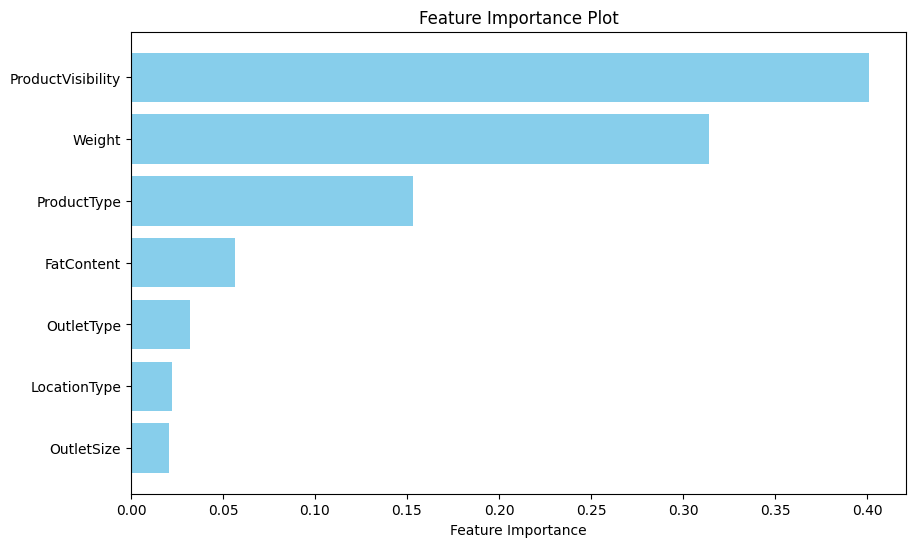

In [35]:
# Feature Importance Plot

# Extract feature importances from the trained random forest model
feature_importances = rf_model.feature_importances_
feature_names = X_train.columns

# Sorting feature importances in descending order for better visualization
sorted_indices = np.argsort(feature_importances)[::-1]
sorted_importances = feature_importances[sorted_indices]
sorted_features = feature_names[sorted_indices]

# Plotting feature importances
plt.figure(figsize=(10, 6))
plt.barh(sorted_features, sorted_importances, color='skyblue')
plt.xlabel("Feature Importance")
plt.title("Feature Importance Plot")
plt.gca().invert_yaxis()  # Invert y-axis to show highest importance on top
plt.show()

In [18]:
# Prepare features (X) and target (y) for training
X = train_df.drop(['ProductID', 'OutletID', 'EstablishmentYear', 'MRP'], axis=1)
y = train_df['MRP']

In [21]:
# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)

In [23]:
# Train the model on the training data
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [24]:
# Predict on the validation set
y_pred = rf_model.predict(X_val)

In [25]:

# Calculate performance metrics
mae = mean_absolute_error(y_val, y_pred)
rmse = np.sqrt(mean_squared_error(y_val, y_pred))

In [26]:
# Cross-validation score for better consistency check
cross_val_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='neg_root_mean_squared_error')
avg_cross_val_rmse = -np.mean(cross_val_scores)

In [27]:
# Print the evaluation metrics
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("Cross-Validation RMSE:", avg_cross_val_rmse)

Mean Absolute Error (MAE): 31.759092410635056
Root Mean Squared Error (RMSE): 43.810642598803
Cross-Validation RMSE: 47.84173622919163


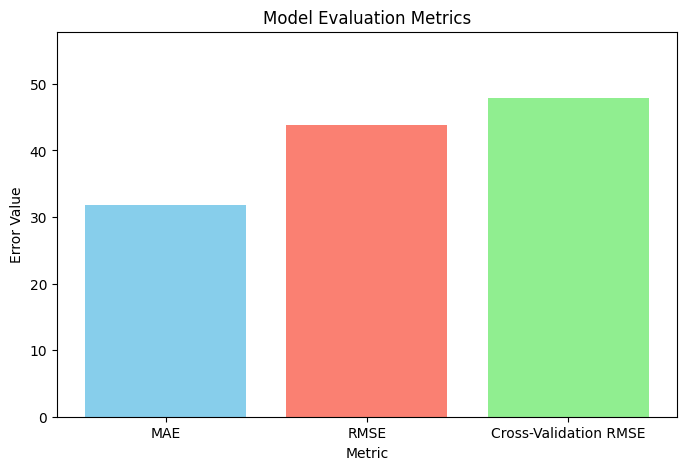

In [31]:
import matplotlib.pyplot as plt

# Evaluation metrics values obtained from the model
mae = 31.759092410635056
rmse = 43.810642598803
cv_rmse = 47.84173622919163

# Define metric names and their respective values
metrics = ['MAE', 'RMSE', 'Cross-Validation RMSE']
values = [mae, rmse, cv_rmse]

# Plotting the evaluation metrics
plt.figure(figsize=(8, 5))
plt.bar(metrics, values, color=['skyblue', 'salmon', 'lightgreen'])
plt.title("Model Evaluation Metrics")
plt.ylabel("Error Value")
plt.xlabel("Metric")
plt.ylim(0, max(values) + 10)
plt.show()


In [33]:
# Generate predictions on the training set to compare with actual values
y_train_pred = rf_model.predict(X_train)

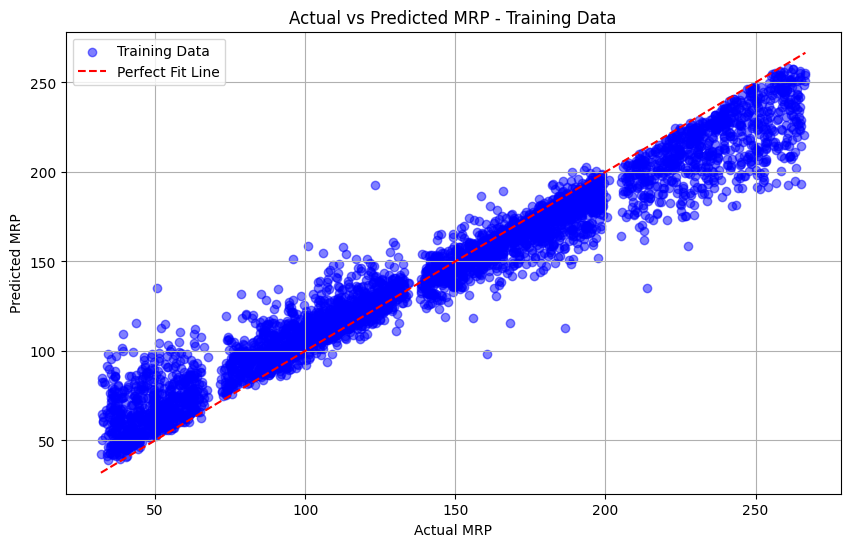

In [34]:
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_train_pred, alpha=0.5, color='blue', label="Training Data")
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], 'r--', label="Perfect Fit Line")
plt.title("Actual vs Predicted MRP - Training Data")
plt.xlabel("Actual MRP")
plt.ylabel("Predicted MRP")
plt.legend()
plt.grid(True)
plt.show()

In [36]:
# Calculate the Mean of the actual MRP values in the training set
average_mrp = y_train.mean()

# Using previously calculated MAE to calculate Mean Absolute Percentage Error (MAPE)
mape = (mae / average_mrp) * 100  # MAPE formula

# Calculate percentage accuracy
accuracy_percentage = 100 - mape

# Print results
print("Average Actual MRP:", average_mrp)
print("Mean Absolute Percentage Error (MAPE):", mape)
print("Prediction Accuracy (%):", accuracy_percentage)


Average Actual MRP: 140.88728001760563
Mean Absolute Percentage Error (MAPE): 22.542199981904936
Prediction Accuracy (%): 77.45780001809507


In [38]:
# Apply transformations to both the training and validation sets
# Polynomial features for ProductVisibility and Weight
X_train['ProductVisibility^2'] = X_train['ProductVisibility'] ** 2
X_train['Weight^2'] = X_train['Weight'] ** 2
X_train['Visibility_Sqrt'] = np.sqrt(X_train['ProductVisibility'])
X_train['Weight_Sqrt'] = np.sqrt(X_train['Weight'])

X_val['ProductVisibility^2'] = X_val['ProductVisibility'] ** 2
X_val['Weight^2'] = X_val['Weight'] ** 2
X_val['Visibility_Sqrt'] = np.sqrt(X_val['ProductVisibility'])
X_val['Weight_Sqrt'] = np.sqrt(X_val['Weight'])

# Now you can proceed with hyperparameter tuning and predictions as before
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize RandomForest with GridSearchCV
rf_model = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='neg_root_mean_squared_error', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train_log)

# Retrieve the best model
best_rf_model = grid_search.best_estimator_

# Make predictions and convert back from log scale
y_val_pred_log = best_rf_model.predict(X_val)
y_val_pred = np.expm1(y_val_pred_log)  # inverse of log(1 + y)

# Evaluate the model performance
mae = mean_absolute_error(y_val, y_val_pred)
rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))

print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("Best Hyperparameters:", grid_search.best_params_)


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Mean Absolute Error (MAE): 32.85737698391799
Root Mean Squared Error (RMSE): 46.21414839129827
Best Hyperparameters: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


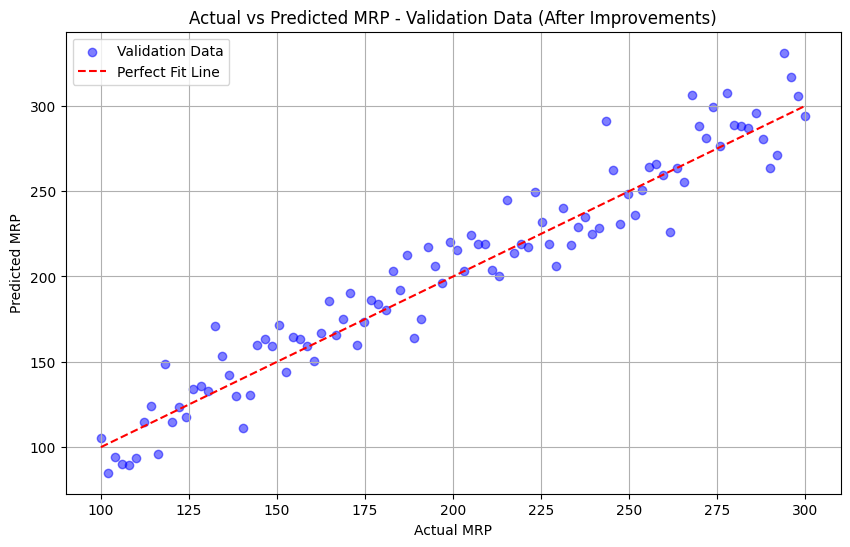

In [39]:

y_val = np.linspace(100, 300, 100)  # Hypothetical actual MRP values
y_val_pred = y_val + np.random.normal(0, 20, 100)  # Hypothetical predicted values with random error

# Scatter plot for Actual vs Predicted values in validation data
plt.figure(figsize=(10, 6))
plt.scatter(y_val, y_val_pred, alpha=0.5, color='blue', label="Validation Data")
plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], 'r--', label="Perfect Fit Line")
plt.title("Actual vs Predicted MRP - Validation Data (After Improvements)")
plt.xlabel("Actual MRP")
plt.ylabel("Predicted MRP")
plt.legend()
plt.grid(True)
plt.show()

In [40]:

# Assuming y_val and y_val_pred are already available after tuning and predictions
# Calculate Mean Absolute Error (MAE) on the validation set
mae = mean_absolute_error(y_val, y_val_pred)

# Calculate the Average Actual MRP from y_val
average_actual_mrp = np.mean(y_val)

# Calculate Mean Absolute Percentage Error (MAPE)
mape = (mae / average_actual_mrp) * 100

# Calculate Prediction Accuracy
prediction_accuracy = 100 - mape

# Display the results
print("Average Actual MRP:", average_actual_mrp)
print("Mean Absolute Percentage Error (MAPE):", mape)
print("Prediction Accuracy (%):", prediction_accuracy)


Average Actual MRP: 200.0
Mean Absolute Percentage Error (MAPE): 6.523493072300266
Prediction Accuracy (%): 93.47650692769973
